In [1]:
results = {
    "Externality Mushrooms - Scenario 1": {
        'GenAgents': [14.4, 22.55, 24.2, 18.35, 16.25, 32.3, 10.3, 21.05, 12.35, 5.0],
        'reflect': [17.7, 15.0, 3.4, 26.05, 1.6, 2.4, 30.5, 18.95, 21.6, 8.8],
        'plan': [9.6, 2.2, 1.4, 26.35, 8.7, 51.0, 7.6, 1.75, 16.95, 6.95],
        'perceive': [12.9, 16.2, 12.7, 8.75, 19.5, 5.0, 10.55, 6.0, 23.35, 11.3],
        'CotAgents': [9.6, 5.1, 11.95, 23.3, 20.75, 16.1, 6.2, 18.15, 14.8, 23.6]
    },
    "Coins - Scenario 1": {
        'GenAgents': [
                36,
                33,
                37,
                43,
                -9,
                11,
                50,
                28,
                47,
                36
            ],
        'reflect': [15, 46, 48, 23, 25, 26, 27, 23, 17, 29],
        'plan': [-36, 23, 0, 6, 6, 2, 6, -41, -46, 35],
        'perceive': [41, 62, 39, 27, 31, 48, 34, 19, 45],
        'CotAgents': [
                20,
                45,
                41,
                50,
                25,
                -13,
                17,
                35,
                36,
                18
            ]
    },
    "Commons Harvest - Scenario 1": {
        'GenAgents': [7.8, 9.4, 7.8, 8.2, 8.4, 9.2, 7.4, 10.8, 8.6, 8.4],
        'reflect': [8.2, 9.6, 9.0, 8.6, 7.2, 9.0, 9.0, 7.6, 10.2, 10.0],
        'plan': [10.4, 5.4, 7.0, 7.4, 10.4, 11.4, 7.2, 8.4, 9.0, 8.6],
        'perceive': [8.2, 7.4, 5.0, 8.0, 6.2, 6.4, 6.4, 7.0, 7.2],
        'CotAgents': [3.0, 5.4, 9.0, 5.0, 7.6, 7.8, 4.8, 5.2, 7.0, 6.2]
    },
}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
def create_box_plot(ax, results, subcat_colors, norm_across_cats=False, **kwargs):
    """
    Creates a box plot with the results of the indicators
    The results are a dictionary with (categories) as keys and as values a dictionary with subcategories as keys and a list with the values for each simulation

    Parameters:
    results (dict): The results of the indicators
    subcat_colors (list): A list with the colors for each subcategory. Each element is a dictionary with the facecolor and the color
    norm_across_cats (bool): If True, the values will be normalized across categories
    **kwargs: Additional parameters for the plot. title and ylabel are supported
    """
    categories = list(results.keys())
    try:
        subcategories = list(results[categories[0]].keys())

    except:
        # If there are is an exception is because the data has no categories
        subcategories = categories
        categories = None
        

    if norm_across_cats and categories is not None:
        results = np.array(list(map(lambda x: list(x.values()), results.values()))) # 3 dimensions: categories, subcategories, simulations
        # Mask to avoid division by zero
        mask = results.sum(axis=0, keepdims=True) == 0
        results = results/(results.sum(axis=0, keepdims=True)+mask)

    if categories is None:
        positions = np.arange(len(subcategories))+1
    else:
        positions = np.arange(len(categories)*len(subcategories))+1
    if kwargs['scale_xticks']:
        positions = positions*kwargs['scale_xticks']
    if kwargs['xticks_translation']:
        positions += kwargs['xticks_translation']

    for s, subcategory in enumerate(subcategories):
        boxprops = subcat_colors[s].copy()
        if categories is not None:
            if norm_across_cats:
                data = [results[c][s] for c in range(len(categories))]
            else:
                data = [results[c][subcategory] for c in categories]
        else:
            # data = results[s]
            data = results[subcategory]
        
        ax.boxplot(data, positions=positions[s::len(subcategories)], patch_artist=True, boxprops=boxprops, showmeans=True)

    if categories is not None:
        ax.set_xticks(positions[::len(subcategories)], kwargs['xticks_names'] if kwargs['xticks_names'] else categories, rotation=30)
    else:
        ax.set_xticks(positions, kwargs['xticks_names'] if kwargs['xticks_names'] else subcategories, rotation=90)

    if 'title' in kwargs:
        ax.set_title(kwargs['title'], fontdict={'fontsize': 10})
    if 'ylabel' in kwargs:
        plt.ylabel(kwargs['ylabel'])

    if categories is not None:
        legend_elements = [Patch(facecolor=subcat_colors[i]['facecolor'], edgecolor=subcat_colors[i]['color'], \
                                label=subcategory) for i, subcategory in enumerate(subcategories)]
        plt.legend(handles=legend_elements, loc='upper right')

    return ax

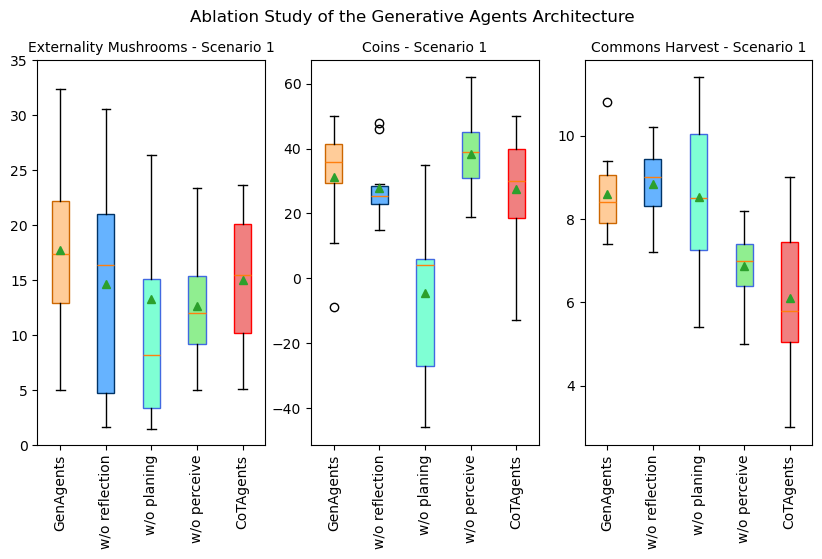

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))
# plt.subplots_adjust(wspace=0.5)
fig.suptitle('Ablation Study of the Generative Agents Architecture')

ax = axs[0]
subcat_colors = [
    {"facecolor": "#ffcc99", "color": "#cc6600"},  # GPT4o-mini (CoTAgents y GenAgents)
    {"facecolor": "#66b3ff", "color": "#003366"},   # GPT4o (CoTAgents y GenAgents)
    {'facecolor': 'aquamarine', 'color': 'royalblue'}, # Llama 70b
    {'facecolor': 'lightgreen', 'color': 'royalblue'}, # Llama 8b
    {'facecolor': 'lightcoral', 'color': 'red'}, # MeltingPot
]
title = 'Externality Mushrooms - Scenario 1'
create_box_plot(ax, results['Externality Mushrooms - Scenario 1'], subcat_colors, title=title, scale_xticks=0.4, 
                     xticks_translation=-0.3,
                     xticks_names=['GenAgents', 'w/o reflection', 'w/o planing', 'w/o perceive', 'CoTAgents']
                     )
ax.set_ylim(0, 35)
ax.set_xlim(-0.1, 1.9)

ax = axs[1]
title = 'Coins - Scenario 1'
create_box_plot(ax, results['Coins - Scenario 1'], subcat_colors, title=title, scale_xticks=0.4, 
                     xticks_translation=-0.3,
                     xticks_names=['GenAgents', 'w/o reflection', 'w/o planing', 'w/o perceive', 'CoTAgents']
)
ax.set_xlim(-0.1, 1.9)

ax = axs[2]
title = 'Commons Harvest - Scenario 1'
create_box_plot(ax, results['Commons Harvest - Scenario 1'], subcat_colors, title=title, scale_xticks=0.4, 
                     xticks_translation=-0.3,
                     xticks_names=['GenAgents', 'w/o reflection', 'w/o planing', 'w/o perceive', 'CoTAgents']
)
ax.set_xlim(-0.1, 1.9)

plt.show()